In [43]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

train data shape : (23524, 13)
test data shape : (10086, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'household_size'}>],
       [<Axes: title={'center': 'age_of_respondent'}>, <Axes: >]],
      dtype=object)

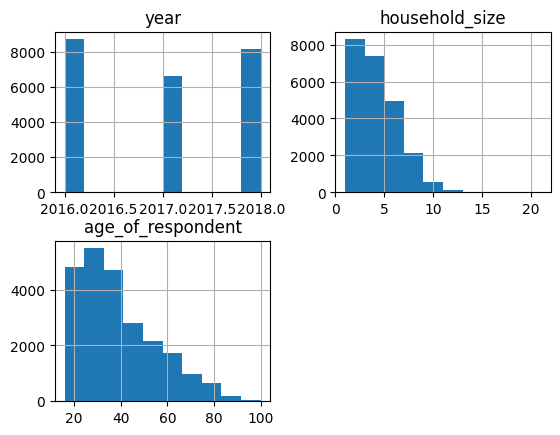

In [8]:
train = pd.read_csv('data/Train.csv')
test = pd.read_csv('data/Test.csv')
ss = pd.read_csv('data/SampleSubmission.csv')
variables = pd.read_csv('data/VariableDefinitions.csv')
print('train data shape :', train.shape)
print('test data shape :', test.shape)
train.head()
train.info()
train.describe()
train.isnull().sum()
train.hist()

#train = pd.get_dummies(train, columns=['relationship_with_head'])
#train = pd.get_dummies(train, columns=['marital_status'])
#train = pd.get_dummies(train, columns=['education_level'])
#train = pd.get_dummies(train, columns=['job_type'])

In [9]:
train.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [10]:
train.country.unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [11]:
train.year.unique()

array([2018, 2016, 2017])

In [12]:
train.location_type.unique()

array(['Rural', 'Urban'], dtype=object)

In [13]:
train.cellphone_access.unique()

array(['Yes', 'No'], dtype=object)

In [14]:
train.household_size.unique()

array([ 3,  5,  8,  7,  1,  6,  4, 10,  2, 11,  9, 12, 16, 15, 13, 14, 21,
       18, 17, 20])

In [15]:
train.age_of_respondent.unique()

array([ 24,  70,  26,  34,  32,  42,  54,  76,  40,  69,  64,  31,  38,
        47,  27,  48,  25,  21,  18,  22,  58,  55,  62,  29,  35,  45,
        67,  19,  80,  66,  50,  33,  28,  51,  16,  17,  30,  37,  59,
        65,  46,  56,  52,  23,  43,  49,  44,  72,  53,  63,  39,  81,
        78,  36,  20,  60,  95,  71,  57,  85,  68,  41,  61,  75,  86,
        73,  93,  74,  88,  90,  77,  84,  82,  89,  79,  83,  94,  87,
        92,  91,  98,  97,  96,  99, 100])

In [16]:
train.gender_of_respondent.unique()

array(['Female', 'Male'], dtype=object)

In [17]:
train.relationship_with_head.unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives'], dtype=object)

In [18]:
train.marital_status.unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know'], dtype=object)

In [25]:
train.education_level.unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

In [26]:
train.job_type.unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

In [24]:
train[train["marital_status"] == "Dont know"]

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
1156,Kenya,2018,uniqueid_1157,No,Rural,Yes,1,50,Male,Head of Household,Dont know,Primary education,Informally employed
2262,Kenya,2018,uniqueid_2263,No,Urban,Yes,1,77,Male,Head of Household,Dont know,Primary education,Remittance Dependent
2609,Kenya,2018,uniqueid_2610,Yes,Urban,Yes,2,34,Male,Head of Household,Dont know,Secondary education,Formally employed Private
2781,Kenya,2018,uniqueid_2782,No,Rural,Yes,4,35,Male,Child,Dont know,No formal education,Farming and Fishing
2981,Kenya,2018,uniqueid_2982,No,Urban,No,1,58,Male,Head of Household,Dont know,Primary education,Informally employed
4778,Kenya,2018,uniqueid_4779,No,Rural,Yes,3,25,Male,Other relative,Dont know,Primary education,Self employed
5033,Kenya,2018,uniqueid_5034,Yes,Urban,Yes,1,33,Male,Head of Household,Dont know,Primary education,Self employed
5295,Kenya,2018,uniqueid_5296,No,Urban,Yes,8,36,Female,Head of Household,Dont know,Primary education,Informally employed


In [ ]:
#todo: Drop the 8 people with marital status dont know 
# 

In [32]:
train.columns

newtrain = train.drop(['uniqueid', 'year', 'country'], axis=1) #drop uniqueid and year = useless, drop country = bias

newtrain = pd.get_dummies(newtrain, columns=['relationship_with_head'])
newtrain = pd.get_dummies(newtrain, columns=['marital_status'])
newtrain = pd.get_dummies(newtrain, columns=['education_level'])
newtrain = pd.get_dummies(newtrain, columns=['job_type'])
newtrain['location_type'] = newtrain['location_type'].map({'Rural': 0, 'Urban': 1})
newtrain['cellphone_access'] = newtrain['cellphone_access'].map({'No': 0, 'Yes': 1})
newtrain['bank_account'] = newtrain['bank_account'].map({'No': 0, 'Yes': 1})
newtrain['gender_of_respondent'] = newtrain['gender_of_respondent'].map({'Male': 0, 'Female': 1})


newtrain.head()


,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,1,0,1,3,24,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,0,0,0,5,70,1,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,1,1,1,5,26,0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,0,0,1,5,34,1,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0,1,0,8,26,0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [39]:
#It is a yes/no question of classification so logistic regression makes sense 

X = newtrain.drop('bank_account', axis=1)
y = newtrain['bank_account']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# penalty: l1 shrinks coefficients of less important features towards zero or even zero
# use it if we believe some features are irrelevant
# l2 shrinks all coefficients towards zero but not necessarily zero
# reduces overall magnitude of coefficients and prevents overfitting 
# probably going to use this because EDA already chose important features 

#c model complexity 
#from 0.001 0.01 0.1 1 10 100 1000
#search for optimal values to get most of our training data


# sag or saga, liblinear if our data is sparse
# trial an error it 

#max iter trial and error 

model = LogisticRegression(penalty='l2', C=1.0, solver='saga', max_iter=1000)


model.fit(X_train, y_train)


y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Accuracy on train data: ", accuracy_score(y_train, y_pred_train))
print("Accuracy on test data: ", accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

# we need to find people who have a bank account
# people who have a bank account are true positive
# false positives should be as few as possible
# we want our precision and recall for predicted 1 to be as high as possible

Accuracy on train data:  0.8830968701843881
Accuracy on test data:  0.8867162592986185
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4063
           1       0.69      0.31      0.43       642

    accuracy                           0.89      4705
   macro avg       0.79      0.64      0.68      4705
weighted avg       0.87      0.89      0.87      4705



<Axes: >

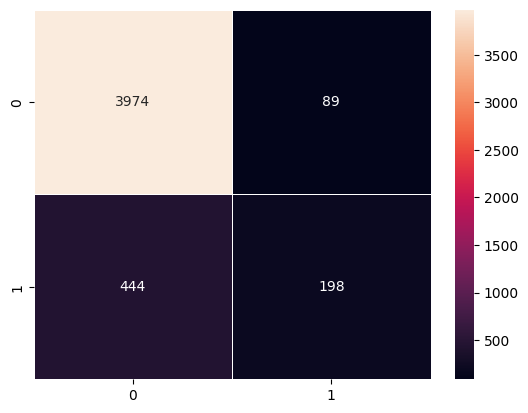

In [41]:
cmlog = confusion_matrix(y_test, y_pred_test)
plt.figure()
sns.heatmap(cmlog, annot=True, fmt="d", linewidths=.5)

In [48]:
dtree = RandomForestClassifier(random_state = 42)
dtree.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
param_grid = {
    'n_estimators': np.arange(100, 501).astype(int),  # amount of trees, more trees more accuracy
    'max_depth': [None] + list(np.arange(3, 11).astype(int)),  # maximum depth of each trees, overfitting if too high
    'max_features': ['auto', 'sqrt', None],  # amount of features considered per split
    'max_leaf_nodes': list(np.arange(10, 31).astype(int)),  # maximum number of end nodes
    'min_samples_split': [2, 5, 10, 15],  # minimum samples required to split a node
    'bootstrap': [True, False]  # whether we bootstrap or not 
}



Accuracy on train data:  0.9729528667835698
Accuracy on test data:  0.8552603613177471
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      4063
           1       0.46      0.38      0.42       642

    accuracy                           0.86      4705
   macro avg       0.68      0.66      0.67      4705
weighted avg       0.84      0.86      0.85      4705



In [ ]:
#TWo other possible models XGBOOST or random forest, probably going for random forest 